In [1]:
# Загружаем необходимые пакеты и устанавливаем необходимые параметры
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import pandas as pd

# Fiddle with figure settings here:
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['font.size'] = 14
plt.rcParams['image.cmap'] = 'plasma'
plt.rcParams['axes.linewidth'] = 2
# Set the default colour cycle (in case someone changes it...)
from cycler import cycler
cols = plt.get_cmap('tab10').colors
plt.rcParams['axes.prop_cycle'] = cycler(color=cols)

# A simple little 2D matrix plotter, excluding x and y labels.
def plot_2d(m, title=""):
    plt.imshow(m)
    plt.xticks([])
    plt.yticks([])
    plt.title(title)

In [2]:
# Загрузка временного ряда
series = pd.read_csv('mean-monthly-air-temperature-deg.csv').dropna().values[:, 1]
series

array([40.6, 40.8, 44.4, 46.7, 54.1, 58.5, 57.7, 56.4, 54.3, 50.5, 42.9,
       39.8, 44.2, 39.8, 45.1, 47.0, 54.1, 58.7, 66.3, 59.9, 57.0, 54.2,
       39.7, 42.8, 37.5, 38.7, 39.5, 42.1, 55.7, 57.8, 56.8, 54.3, 54.3,
       47.1, 41.8, 41.7, 41.8, 40.1, 42.9, 45.8, 49.2, 52.7, 64.2, 59.6,
       54.4, 49.2, 36.6, 37.6, 39.3, 37.5, 38.3, 45.5, 53.2, 57.7, 60.8,
       58.2, 56.4, 49.8, 44.4, 43.6, 40.0, 40.5, 40.8, 45.1, 53.8, 59.4,
       63.5, 61.0, 53.0, 50.0, 38.1, 36.3, 39.2, 43.4, 43.4, 48.9, 50.6,
       56.8, 62.5, 62.0, 57.5, 46.7, 41.6, 39.8, 39.4, 38.5, 45.3, 47.1,
       51.7, 55.0, 60.4, 60.5, 54.7, 50.3, 42.3, 35.2, 40.8, 41.1, 42.8,
       47.3, 50.9, 56.4, 62.2, 60.5, 55.4, 50.2, 43.0, 37.3, 34.8, 31.3,
       41.0, 43.9, 53.1, 56.9, 62.5, 60.3, 59.8, 49.2, 42.9, 41.9, 41.6,
       37.1, 41.2, 46.9, 51.2, 60.4, 60.1, 61.6, 57.0, 50.9, 43.0, 38.8,
       37.1, 38.4, 38.4, 46.5, 53.5, 58.4, 60.6, 58.2, 53.8, 46.6, 45.5,
       40.6, 42.4, 38.4, 40.3, 44.6, 50.9, 57.0, 62

In [3]:
# Временной ряд загрузился как dtype = object, переведем значения в тип float
series = series.astype('float')
t = np.arange(0,len(series))
series

array([40.6, 40.8, 44.4, 46.7, 54.1, 58.5, 57.7, 56.4, 54.3, 50.5, 42.9,
       39.8, 44.2, 39.8, 45.1, 47. , 54.1, 58.7, 66.3, 59.9, 57. , 54.2,
       39.7, 42.8, 37.5, 38.7, 39.5, 42.1, 55.7, 57.8, 56.8, 54.3, 54.3,
       47.1, 41.8, 41.7, 41.8, 40.1, 42.9, 45.8, 49.2, 52.7, 64.2, 59.6,
       54.4, 49.2, 36.6, 37.6, 39.3, 37.5, 38.3, 45.5, 53.2, 57.7, 60.8,
       58.2, 56.4, 49.8, 44.4, 43.6, 40. , 40.5, 40.8, 45.1, 53.8, 59.4,
       63.5, 61. , 53. , 50. , 38.1, 36.3, 39.2, 43.4, 43.4, 48.9, 50.6,
       56.8, 62.5, 62. , 57.5, 46.7, 41.6, 39.8, 39.4, 38.5, 45.3, 47.1,
       51.7, 55. , 60.4, 60.5, 54.7, 50.3, 42.3, 35.2, 40.8, 41.1, 42.8,
       47.3, 50.9, 56.4, 62.2, 60.5, 55.4, 50.2, 43. , 37.3, 34.8, 31.3,
       41. , 43.9, 53.1, 56.9, 62.5, 60.3, 59.8, 49.2, 42.9, 41.9, 41.6,
       37.1, 41.2, 46.9, 51.2, 60.4, 60.1, 61.6, 57. , 50.9, 43. , 38.8,
       37.1, 38.4, 38.4, 46.5, 53.5, 58.4, 60.6, 58.2, 53.8, 46.6, 45.5,
       40.6, 42.4, 38.4, 40.3, 44.6, 50.9, 57. , 62

Text(0.5, 1.0, 'Mean monthly air temperature, deg')

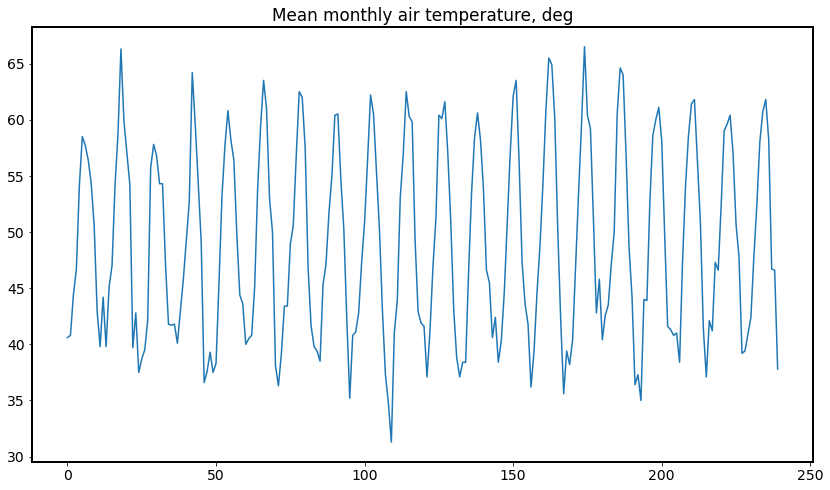

In [4]:
# Строим график временного ряда
plt.style.context('bmh')
plt.figure(figsize=(14, 8))
plt.plot(series)
plt.title('Mean monthly air temperature, deg')

In [5]:
# 1. Построим матрицу траекторий
N = len(series)
L = 80 # The window length

In [6]:
K = N - L + 1 # The number of columns in the trajectory matrix.

In [7]:
# Create the trajectory matrix by pulling the relevant subseries of F, and stacking them as columns.
X = np.column_stack([series[i:i+L] for i in range(0,K)])
# Note: the i+L above gives us up to i+L-1, as numpy array upper bounds are exclusive. 
X

array([[40.6, 40.8, 44.4, ..., 44.5, 48.7, 54.2],
       [40.8, 44.4, 46.7, ..., 48.7, 54.2, 60.8],
       [44.4, 46.7, 54.1, ..., 54.2, 60.8, 65.5],
       ...,
       [56.8, 62.5, 62. , ..., 61.8, 58.2, 46.7],
       [62.5, 62. , 57.5, ..., 58.2, 46.7, 46.6],
       [62. , 57.5, 46.7, ..., 46.7, 46.6, 37.8]])

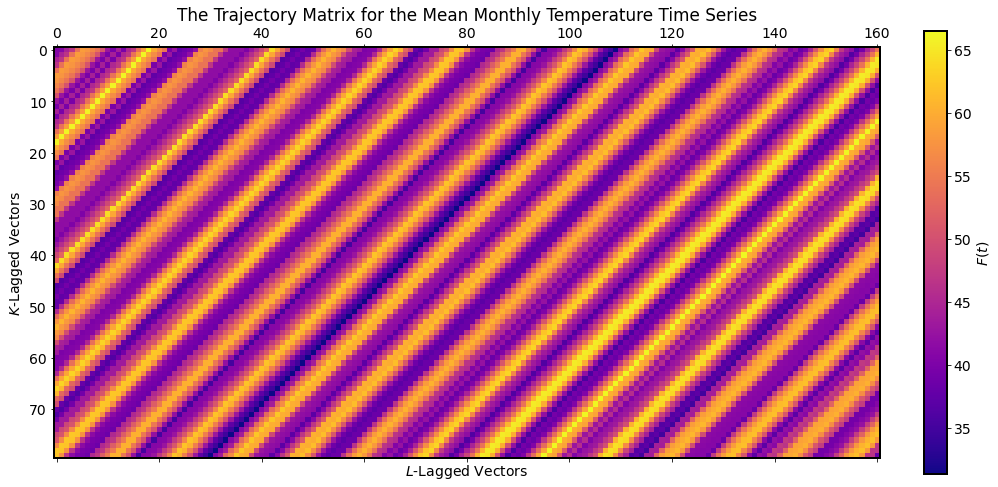

In [8]:
ax = plt.matshow(X)
plt.xlabel("$L$-Lagged Vectors")
plt.ylabel("$K$-Lagged Vectors")
plt.colorbar(ax.colorbar, fraction=0.025)
ax.colorbar.set_label("$F(t)$")
plt.title("The Trajectory Matrix for the Mean Monthly Temperature Time Series");

In [9]:
# 2. Разложим матрицу траектории
d = np.linalg.matrix_rank(X) # The intrinsic dimensionality of the trajectory space.
U, Sigma, V = np.linalg.svd(X)
V = V.T # Note: the SVD routine returns V^T, not V, so I'll tranpose it back here. This may seem pointless, 
# but I'll treat the Python representation of V consistently with the mathematical notation in this notebook.

# Calculate the elementary matrices of X, storing them in a multidimensional NumPy array.
# This requires calculating sigma_i * U_i * (V_i)^T for each i, or sigma_i * outer_product(U_i, V_i). 
# Note that Sigma is a 1D array of singular values, instead of the full L x K diagonal matrix.
X_elem = np.array( [Sigma[i] * np.outer(U[:,i], V[:,i]) for i in range(0,d)] )

# Quick sanity check: the sum of all elementary matrices in X_elm should be equal to X, to within a 
# *very small* tolerance:
if not np.allclose(X, X_elem.sum(axis=0), atol=1e-10):
    print("WARNING: The sum of X's elementary matrices is not equal to X!")

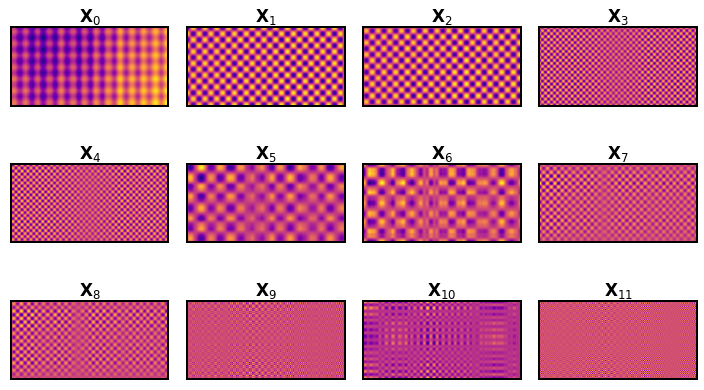

In [10]:
n = min(12, d) # In case d is less than 12 for the series. Say, if we were to exclude the noise component...
for i in range(n):
    plt.subplot(4,4,i+1)
    title = "$\mathbf{X}_{" + str(i) + "}$"
    plot_2d(X_elem[i], title)
plt.tight_layout()

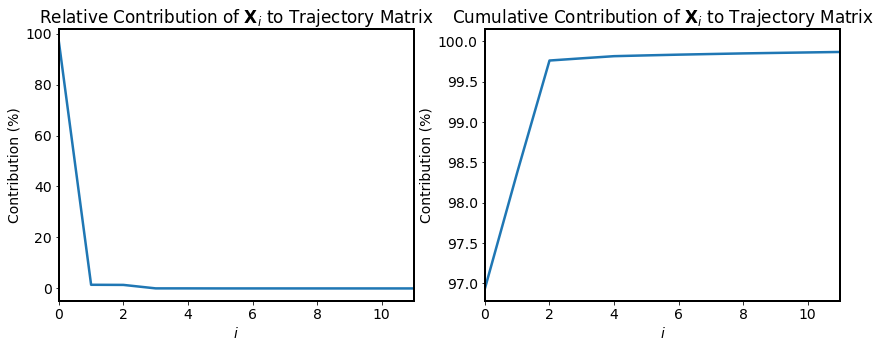

In [11]:
sigma_sumsq = (Sigma**2).sum()
fig, ax = plt.subplots(1, 2, figsize=(14,5))
ax[0].plot(Sigma**2 / sigma_sumsq * 100, lw=2.5)
ax[0].set_xlim(0,11)
ax[0].set_title("Relative Contribution of $\mathbf{X}_i$ to Trajectory Matrix")
ax[0].set_xlabel("$i$")
ax[0].set_ylabel("Contribution (%)")
ax[1].plot((Sigma**2).cumsum() / sigma_sumsq * 100, lw=2.5)
ax[1].set_xlim(0,11)
ax[1].set_title("Cumulative Contribution of $\mathbf{X}_i$ to Trajectory Matrix")
ax[1].set_xlabel("$i$")
ax[1].set_ylabel("Contribution (%)");

In [12]:
# Реконструируем временной ряд
def Hankelise(X):
    """
    Hankelises the matrix X, returning H(X).
    """
    L, K = X.shape
    transpose = False
    if L > K:
        # The Hankelisation below only works for matrices where L < K.
        # To Hankelise a L > K matrix, first swap L and K and tranpose X.
        # Set flag for HX to be transposed before returning. 
        X = X.T
        L, K = K, L
        transpose = True

    HX = np.zeros((L,K))
    
    # I know this isn't very efficient...
    for m in range(L):
        for n in range(K):
            s = m+n
            if 0 <= s <= L-1:
                for l in range(0,s+1):
                    HX[m,n] += 1/(s+1)*X[l, s-l]    
            elif L <= s <= K-1:
                for l in range(0,L-1):
                    HX[m,n] += 1/(L-1)*X[l, s-l]
            elif K <= s <= K+L-2:
                for l in range(s-K+1,L):
                    HX[m,n] += 1/(K+L-s-1)*X[l, s-l]
    if transpose:
        return HX.T
    else:
        return HX

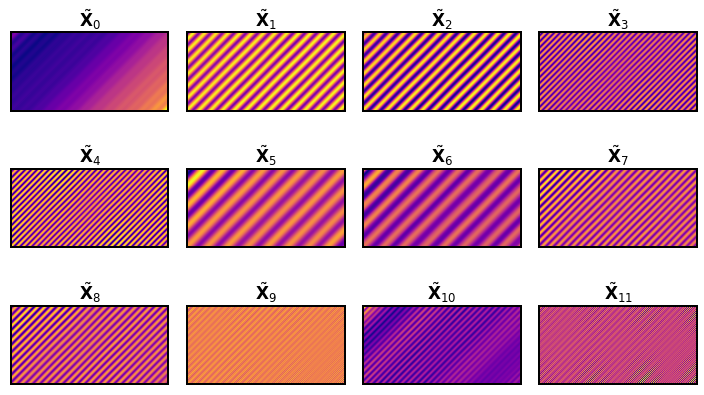

In [13]:
n = min(d, 12)
for j in range(0,n):
    plt.subplot(4,4,j+1)
    title = r"$\tilde{\mathbf{X}}_{" + str(j) + "}$"
    plot_2d(Hankelise(X_elem[j]), title)
plt.tight_layout() 

In [14]:
def X_to_TS(X_i):
    """Averages the anti-diagonals of the given elementary matrix, X_i, and returns a time series."""
    # Reverse the column ordering of X_i
    X_rev = X_i[::-1]
    # Full credit to Mark Tolonen at https://stackoverflow.com/a/6313414 for this one:
    return np.array([X_rev.diagonal(i).mean() for i in range(-X_i.shape[0]+1, X_i.shape[1])])

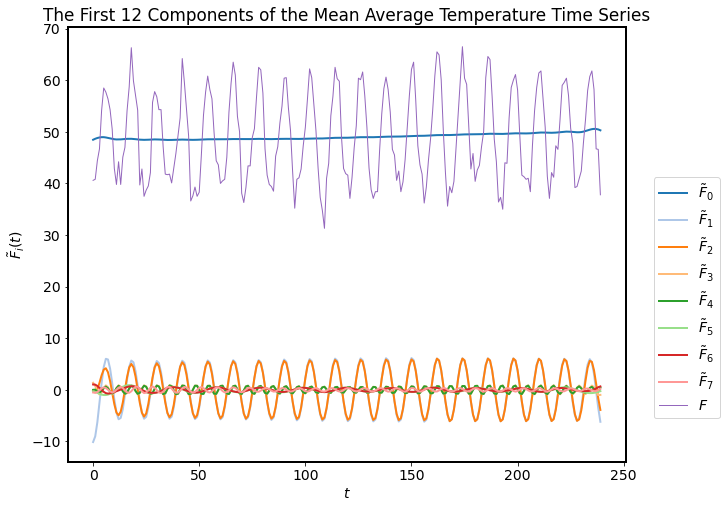

In [15]:
n = min(8,d) # In case of noiseless time series with d < 12.

# Fiddle with colour cycle - need more colours!
fig = plt.subplot()
color_cycle = cycler(color=plt.get_cmap('tab20').colors)
fig.axes.set_prop_cycle(color_cycle)

# Convert elementary matrices straight to a time series - no need to construct any Hankel matrices.
for i in range(n):
    F_i = X_to_TS(X_elem[i])
    fig.axes.plot(t, F_i, lw=2)

fig.axes.plot(t, series, alpha=1, lw=1)
fig.set_xlabel("$t$")
fig.set_ylabel(r"$\tilde{F}_i(t)$")
legend = [r"$\tilde{F}_{%s}$" %i for i in range(n)] + ["$F$"]
fig.set_title("The First 12 Components of the Mean Average Temperature Time Series")
fig.legend(legend, loc=(1.05,0.1));

Судя по графику выше, временной ряд можно разложить на тренд, три периодики и шум. Сгруппируем эти компоненты ниже

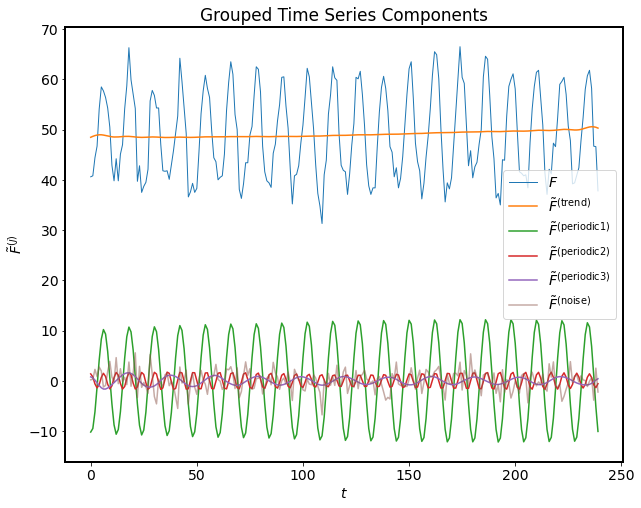

In [16]:
# Assemble the grouped components of the time series.
F_trend = X_to_TS(X_elem[[0]].sum(axis=0))
F_periodic1 = X_to_TS(X_elem[[1,2]].sum(axis=0))
F_periodic2 = X_to_TS(X_elem[[3,4]].sum(axis=0))
F_periodic3 = X_to_TS(X_elem[[5,6]].sum(axis=0))
F_noise = X_to_TS(X_elem[7:].sum(axis=0))

# Plot the toy time series and its separated components on a single plot.
plt.plot(t,series, lw=1)
plt.plot(t, F_trend)
plt.plot(t, F_periodic1)
plt.plot(t, F_periodic2)
plt.plot(t, F_periodic3)
plt.plot(t, F_noise, alpha=0.5)
plt.xlabel("$t$")
plt.ylabel(r"$\tilde{F}^{(j)}$")
groups = ["trend", "periodic 1", "periodic 2", "periodic 3", "noise"]
legend = ["$F$"] + [r"$\tilde{F}^{(\mathrm{%s})}$"%group for group in groups]
plt.legend(legend)
plt.title("Grouped Time Series Components")
plt.show()

In [17]:
# 3. Разделение и группировка компонентов временного ряда
# Get the weights w first, as they'll be reused a lot.
# Note: list(np.arange(L)+1) returns the sequence 1 to L (first line in definition of w), 
# [L]*(K-L-1) repeats L K-L-1 times (second line in w definition)
# list(np.arange(L)+1)[::-1] reverses the first list (equivalent to the third line)
# Add all the lists together and we have our array of weights.
w = np.array(list(np.arange(L)+1) + [L]*(K-L-1) + list(np.arange(L)+1)[::-1])

# Get all the components of the toy series, store them as columns in F_elem array.
F_elem = np.array([X_to_TS(X_elem[i]) for i in range(d)])

# Calculate the individual weighted norms, ||F_i||_w, first, then take inverse square-root so we don't have to later.
F_wnorms = np.array([w.dot(F_elem[i]**2) for i in range(d)])
F_wnorms = F_wnorms**-0.5

# Calculate the w-corr matrix. The diagonal elements are equal to 1, so we can start with an identity matrix
# and iterate over all pairs of i's and j's (i != j), noting that Wij = Wji.
Wcorr = np.identity(d)
for i in range(d):
    for j in range(i+1,d):
        Wcorr[i,j] = abs(w.dot(F_elem[i]*F_elem[j]) * F_wnorms[i] * F_wnorms[j])
        Wcorr[j,i] = Wcorr[i,j]

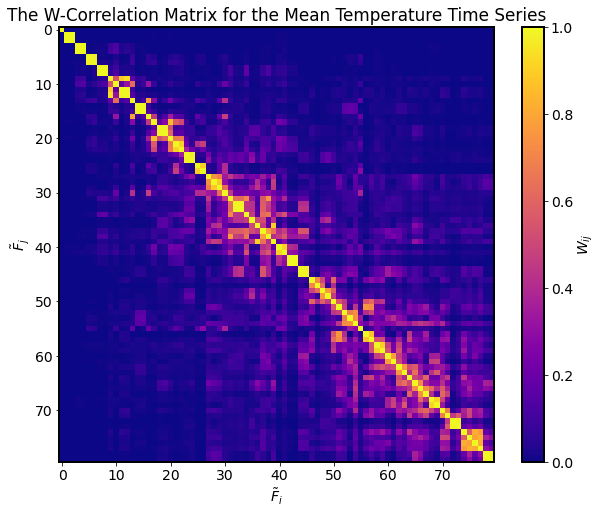

In [18]:
ax = plt.imshow(Wcorr)
plt.xlabel(r"$\tilde{F}_i$")
plt.ylabel(r"$\tilde{F}_j$")
plt.colorbar(ax.colorbar, fraction=0.045)
ax.colorbar.set_label("$W_{ij}$")
plt.clim(0,1)
plt.title("The W-Correlation Matrix for the Mean Temperature Time Series");

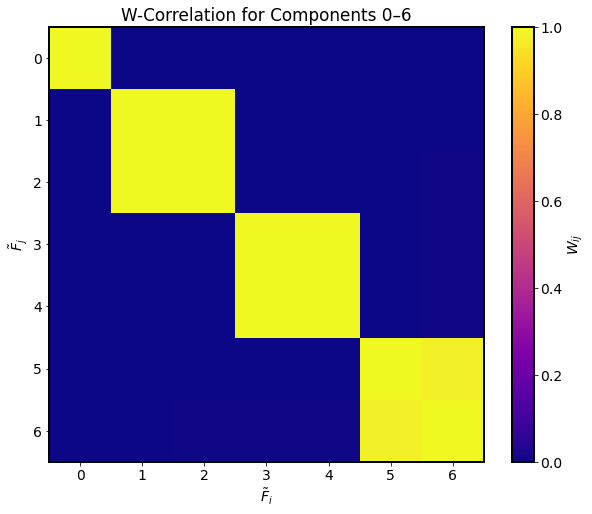

In [19]:
ax = plt.imshow(Wcorr)
plt.xlabel(r"$\tilde{F}_i$")
plt.ylabel(r"$\tilde{F}_j$")
plt.colorbar(ax.colorbar, fraction=0.045)
ax.colorbar.set_label("$W_{ij}$")
plt.xlim(-0.5,6.5)
plt.ylim(6.5,-0.5)
plt.clim(0,1)
plt.title(r"W-Correlation for Components 0–6");

Судя по графику выше, видим, что единичная корреляция присутствует между 2 и 1-ой компонентами (что соответствует 
первой периодике), 3 и 4-ой компонентами (что соответствует 2-ой периодике ), 5-ой и 6-ой компонентами (соответствует
                                                                                                       3-ей периодике) 

In [20]:
# Класс Python для SSA
class SSA(object):
    
    __supported_types = (pd.Series, np.ndarray, list)
    
    def __init__(self, tseries, L, save_mem=True):
        """
        Decomposes the given time series with a singular-spectrum analysis. Assumes the values of the time series are
        recorded at equal intervals.
        
        Parameters
        ----------
        tseries : The original time series, in the form of a Pandas Series, NumPy array or list. 
        L : The window length. Must be an integer 2 <= L <= N/2, where N is the length of the time series.
        save_mem : Conserve memory by not retaining the elementary matrices. Recommended for long time series with
            thousands of values. Defaults to True.
        
        Note: Even if an NumPy array or list is used for the initial time series, all time series returned will be
        in the form of a Pandas Series or DataFrame object.
        """
        
        # Tedious type-checking for the initial time series
        if not isinstance(tseries, self.__supported_types):
            raise TypeError("Unsupported time series object. Try Pandas Series, NumPy array or list.")
        
        # Checks to save us from ourselves
        self.N = len(tseries)
        if not 2 <= L <= self.N/2:
            raise ValueError("The window length must be in the interval [2, N/2].")
        
        self.L = L
        self.orig_TS = pd.Series(tseries)
        self.K = self.N - self.L + 1
        
        # Embed the time series in a trajectory matrix
        self.X = np.array([self.orig_TS.values[i:L+i] for i in range(0, self.K)]).T
        
        # Decompose the trajectory matrix
        self.U, self.Sigma, VT = np.linalg.svd(self.X)
        self.d = np.linalg.matrix_rank(self.X)
        
        self.TS_comps = np.zeros((self.N, self.d))
        
        if not save_mem:
            # Construct and save all the elementary matrices
            self.X_elem = np.array([ self.Sigma[i]*np.outer(self.U[:,i], VT[i,:]) for i in range(self.d) ])

            # Diagonally average the elementary matrices, store them as columns in array.           
            for i in range(self.d):
                X_rev = self.X_elem[i, ::-1]
                self.TS_comps[:,i] = [X_rev.diagonal(j).mean() for j in range(-X_rev.shape[0]+1, X_rev.shape[1])]
            
            self.V = VT.T
        else:
            # Reconstruct the elementary matrices without storing them
            for i in range(self.d):
                X_elem = self.Sigma[i]*np.outer(self.U[:,i], VT[i,:])
                X_rev = X_elem[::-1]
                self.TS_comps[:,i] = [X_rev.diagonal(j).mean() for j in range(-X_rev.shape[0]+1, X_rev.shape[1])]
            
            self.X_elem = "Re-run with save_mem=False to retain the elementary matrices."
            
            # The V array may also be very large under these circumstances, so we won't keep it.
            self.V = "Re-run with save_mem=False to retain the V matrix."
        
        # Calculate the w-correlation matrix.
        self.calc_wcorr()
            
    def components_to_df(self, n=0):
        """
        Returns all the time series components in a single Pandas DataFrame object.
        """
        if n > 0:
            n = min(n, self.d)
        else:
            n = self.d
        
        # Create list of columns - call them F0, F1, F2, ...
        cols = ["F{}".format(i) for i in range(n)]
        return pd.DataFrame(self.TS_comps[:, :n], columns=cols, index=self.orig_TS.index)
            
    
    def reconstruct(self, indices):
        """
        Reconstructs the time series from its elementary components, using the given indices. Returns a Pandas Series
        object with the reconstructed time series.
        
        Parameters
        ----------
        indices: An integer, list of integers or slice(n,m) object, representing the elementary components to sum.
        """
        if isinstance(indices, int): indices = [indices]
        
        ts_vals = self.TS_comps[:,indices].sum(axis=1)
        return pd.Series(ts_vals, index=self.orig_TS.index)
    
    def calc_wcorr(self):
        """
        Calculates the w-correlation matrix for the time series.
        """
             
        # Calculate the weights
        w = np.array(list(np.arange(self.L)+1) + [self.L]*(self.K-self.L-1) + list(np.arange(self.L)+1)[::-1])
        
        def w_inner(F_i, F_j):
            return w.dot(F_i*F_j)
        
        # Calculated weighted norms, ||F_i||_w, then invert.
        F_wnorms = np.array([w_inner(self.TS_comps[:,i], self.TS_comps[:,i]) for i in range(self.d)])
        F_wnorms = F_wnorms**-0.5
        
        # Calculate Wcorr.
        self.Wcorr = np.identity(self.d)
        for i in range(self.d):
            for j in range(i+1,self.d):
                self.Wcorr[i,j] = abs(w_inner(self.TS_comps[:,i], self.TS_comps[:,j]) * F_wnorms[i] * F_wnorms[j])
                self.Wcorr[j,i] = self.Wcorr[i,j]
    
    def plot_wcorr(self, min=None, max=None):
        """
        Plots the w-correlation matrix for the decomposed time series.
        """
        if min is None:
            min = 0
        if max is None:
            max = self.d
        
        if self.Wcorr is None:
            self.calc_wcorr()
        
        ax = plt.imshow(self.Wcorr)
        plt.xlabel(r"$\tilde{F}_i$")
        plt.ylabel(r"$\tilde{F}_j$")
        plt.colorbar(ax.colorbar, fraction=0.045)
        ax.colorbar.set_label("$W_{i,j}$")
        plt.clim(0,1)
        
        # For plotting purposes:
        if max == self.d:
            max_rnge = self.d-1
        else:
            max_rnge = max
        
        plt.xlim(min-0.5, max_rnge+0.5)
        plt.ylim(max_rnge+0.5, min-0.5)
        

Проверим, как влияет длинна окна на результаты разделения временного ряда на компоненты с помощью метода SSA

Длина окна равная 2-м позволяет разделить ряд на 2 компоненты: шум и периодику (грубо), не выделяя тренда

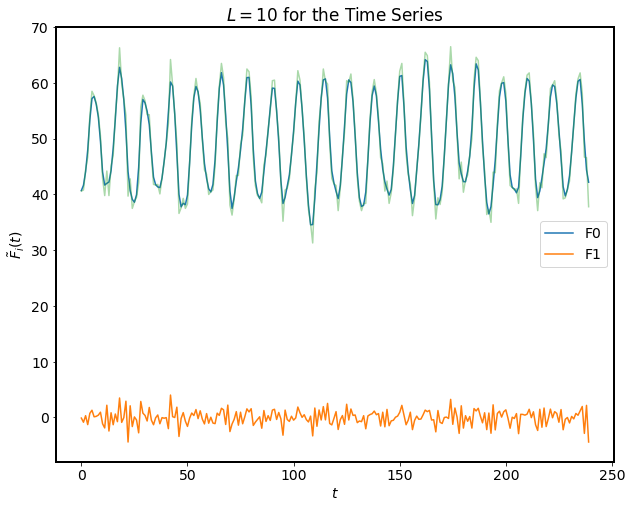

In [21]:
F_ssa_L2 = SSA(series, 2)
F_ssa_L2.components_to_df().plot()
F_ssa_L2.orig_TS.plot(alpha=0.4)
plt.xlabel("$t$")
plt.ylabel(r"$\tilde{F}_i(t)$")
plt.title(r"$L=10$ for the Time Series");

Длина окна равная 5 также не позволяет выделить тренд, однако здесь мы видим выделение уже нескольких колебательных составляющих.

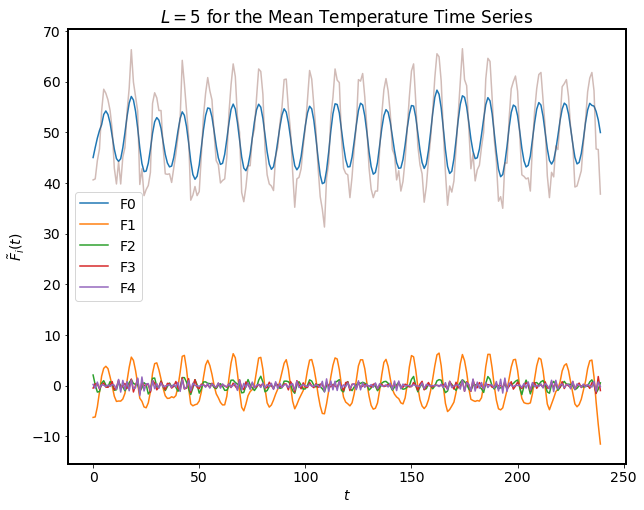

In [22]:
F_ssa_L5 = SSA(series, 5)
F_ssa_L5.components_to_df().plot()
F_ssa_L5.orig_TS.plot(alpha=0.4)
plt.xlabel("$t$")
plt.ylabel(r"$\tilde{F}_i(t)$")
plt.title(r"$L=5$ for the Mean Temperature Time Series");
plt.show()

Длина окна равная 20 позволяет увидеть на матрице w-корреляций несколько блоков: 1 и 2, от 3 до 7, от 8 до 12, начиная с 13.
    Здесь мы уже видим трендовую составляющую, однако она является колебательной, из чего можно сделать вывод о необходимости
    увеличения длины окна. Периодическая компонента с 3 до 7 также выглядит зашумленной.

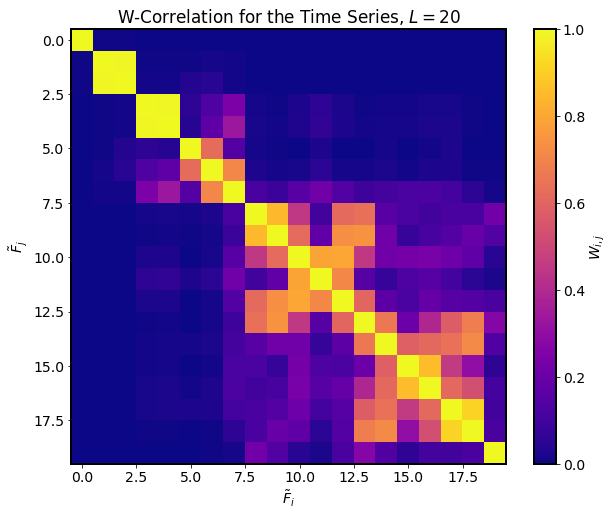

In [23]:
F_ssa_L20 = SSA(series, 20)
F_ssa_L20.plot_wcorr()
plt.title("W-Correlation for the Time Series, $L=20$");

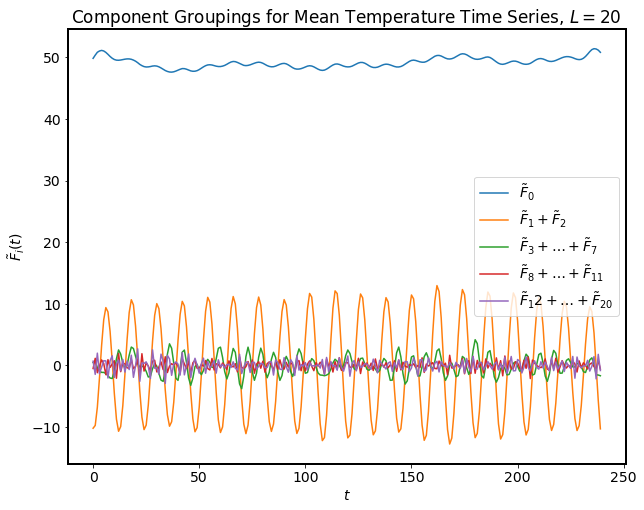

In [24]:
F_ssa_L20.reconstruct(0).plot()
F_ssa_L20.reconstruct([1,2]).plot()
F_ssa_L20.reconstruct([3,4,5,6,7]).plot()
F_ssa_L20.reconstruct([8,9,10,12]).plot()
F_ssa_L20.reconstruct(slice(13,20)).plot()
plt.xlabel("$t$")
plt.ylabel(r"$\tilde{F}_i(t)$")
plt.title("Component Groupings for Mean Temperature Time Series, $L=20$");
plt.legend([r"$\tilde{F}_0$", 
            r"$\tilde{F}_1+\tilde{F}_2$",
            r"$\tilde{F}_3+ \ldots + \tilde{F}_{7}$",
            r"$\tilde{F}_8+ \ldots + \tilde{F}_{11}$", 
            r"$\tilde{F}_12+ \ldots + \tilde{F}_{20}$"]);

Длина окна равная 40 уже практически выравнивает трендовую составляющую. На матрице w-корреляций несколько блоков:
    1 и 2, 3 и 4, от 5 до 10, начиная с 11. Отчетливо выделяются две периодические компоненты. Периодическая компонента от 5 до 10 также выглядит зашумленной.

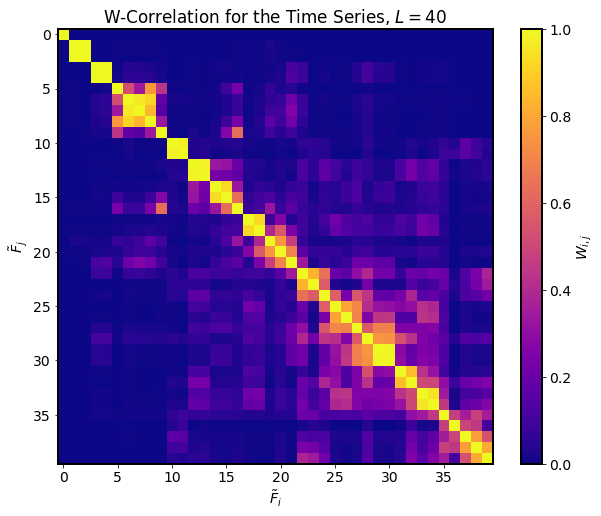

In [25]:
F_ssa_L40 = SSA(series, 40)
F_ssa_L40.plot_wcorr()
plt.title("W-Correlation for the Time Series, $L=40$");

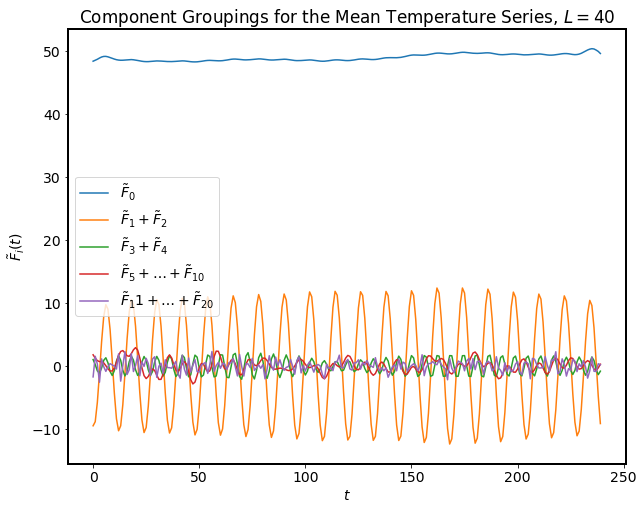

In [26]:
F_ssa_L40.reconstruct(0).plot()
F_ssa_L40.reconstruct([1,2]).plot()
F_ssa_L40.reconstruct([3,4]).plot()
F_ssa_L40.reconstruct(slice(5,10)).plot()
F_ssa_L40.reconstruct(slice(11,20)).plot()
plt.xlabel("$t$")
plt.ylabel(r"$\tilde{F}_i(t)$")
plt.title("Component Groupings for the Mean Temperature Series, $L=40$");
plt.legend([r"$\tilde{F}_0$", 
            r"$\tilde{F}_1+\tilde{F}_2$", 
            r"$\tilde{F}_3+\tilde{F}_4$",      
            r"$\tilde{F}_5+ \ldots + \tilde{F}_{10}$",
            r"$\tilde{F}_11+ \ldots + \tilde{F}_{20}$"]);

Длины окна 60 хватает для выравнивания трендовой составляющей. 
На матрице w-корреляций несколько блоков: 1 и 2, 3 и 4, 5 и 6, начиная с 7. 
    Отчетливо выделяются три периодические компоненты. Периодическая компонента 5 и 6 выглядит зашумленной. Из чего можно сделать вывод, что необходимо еще увеличить длину окна.
    Изначально в работе была выбрана длина окна равная 80, которая позволяет получить "чистый" тренд, три "чистые" периодики
    и выделить шум. Из чего можно сделать вывод о том, что данная длина окна является приемлемой.

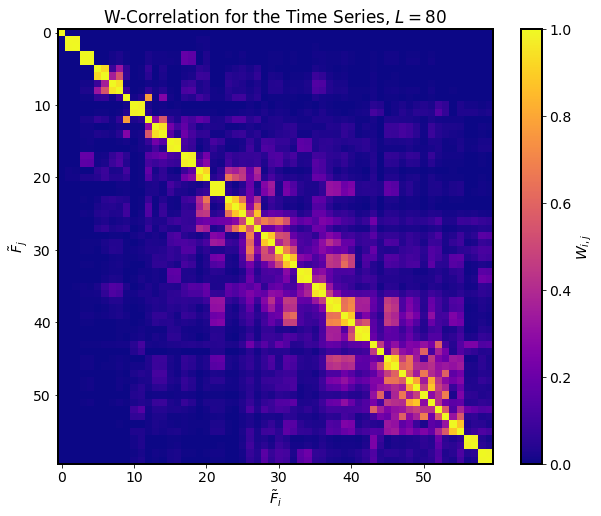

In [27]:
F_ssa_L60 = SSA(series, 60)
F_ssa_L60.plot_wcorr()
plt.title("W-Correlation for the Time Series, $L=80$");

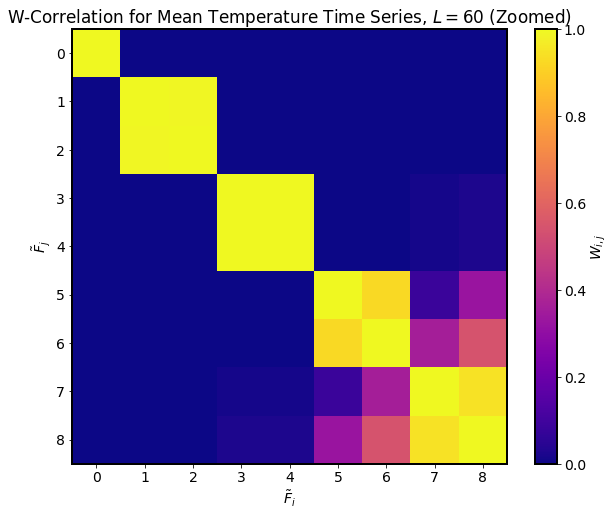

In [28]:
F_ssa_L60.plot_wcorr(max=8)
plt.title("W-Correlation for Mean Temperature Time Series, $L=60$ (Zoomed)");

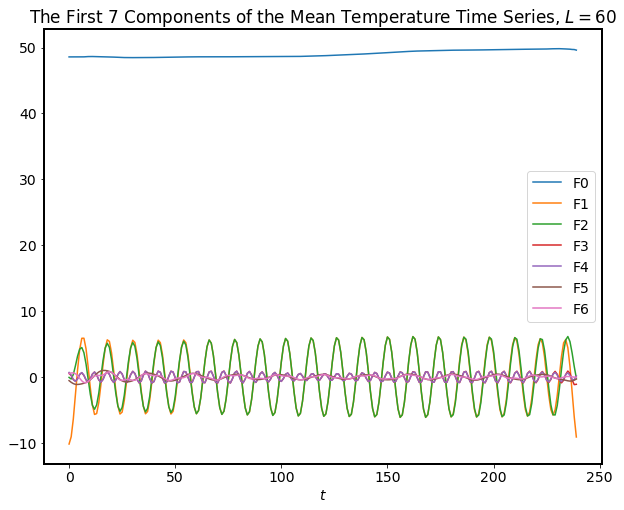

In [29]:
F_ssa_L60.components_to_df(n=7).plot()
plt.title(r"The First 7 Components of the Mean Temperature Time Series, $L=60$")
plt.xlabel(r"$t$");

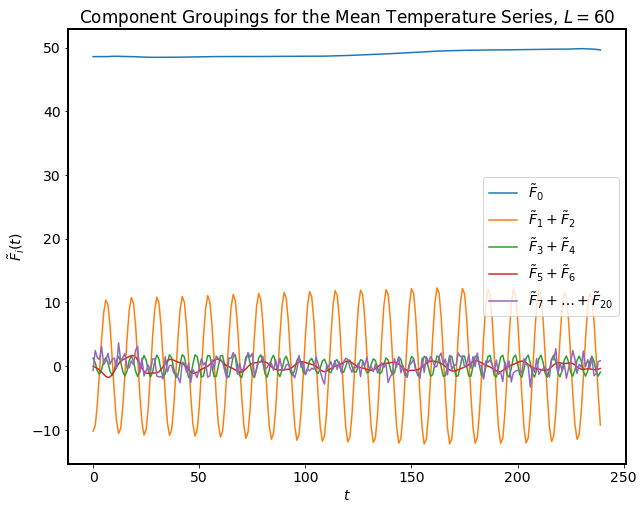

In [30]:
F_ssa_L60.reconstruct(0).plot()
F_ssa_L60.reconstruct([1,2]).plot()
F_ssa_L60.reconstruct([3,4]).plot()
F_ssa_L60.reconstruct([5,6]).plot()
F_ssa_L60.reconstruct(slice(7,20)).plot()
plt.xlabel("$t$")
plt.ylabel(r"$\tilde{F}_i(t)$")
plt.title("Component Groupings for the Mean Temperature Series, $L=60$");
plt.legend([r"$\tilde{F}_0$", 
            r"$\tilde{F}_1+\tilde{F}_2$", 
            r"$\tilde{F}_3+\tilde{F}_4$", 
            r"$\tilde{F}_5+\tilde{F}_6$",
            r"$\tilde{F}_7+ \ldots + \tilde{F}_{20}$"]);